In [1]:
import math

# exploring limits
GRAVITY = 9.8

# where time is on the x-axis so x = number of seconds.
# intentionally confusing just like all math examples
velocityAt = lambda x: (GRAVITY * x)

SECONDS = 5
print(f'Velocity at {SECONDS} seconds: {velocityAt(SECONDS)}')

Velocity at 5 seconds: 49.0


Limits play a crucial role in the concept of differentiation, providing a rigorous foundation for understanding derivatives and instantaneous rates of change. In calculus, a limit describes the value a function approaches as the input approaches a certain value. The concept of a limit is used to formally define the derivative of a function, which represents the instantaneous rate of change of the function with respect to its input variable.

To understand how limits relate to differentiation, let's consider a function f(x). We want to find the slope of the tangent line to the curve defined by f(x) at a specific point, say x = a. The slope of the tangent line represents the instantaneous rate of change of f(x) at x = a.

To find this slope, we can start by considering the average rate of change of f(x) over a small interval around x = a, from x = a to x = a + h, where h is a small, non-zero value. The average rate of change in this interval is given by the difference quotient:

(f(a + h) - f(a)) / h

Now, to find the instantaneous rate of change at x = a, we need to find the value that the difference quotient approaches as h approaches zero. This is where the concept of a limit comes into play. The derivative of the function f(x) at x = a, denoted by f'(a), is defined as the limit of the difference quotient as h approaches zero:

f'(a) = lim (h -> 0) [(f(a + h) - f(a)) / h]

If this limit exists, then f(x) is said to be differentiable at x = a, and the value of the limit, f'(a), represents the slope of the tangent line to the curve at x = a.

In summary, limits are essential to the concept of differentiation because they allow us to rigorously define the derivative of a function as the limit of the difference quotient. This provides a solid foundation for understanding instantaneous rates of change and the behavior of functions as their input values change.

In [2]:
# find the limit of the function to get instantaneous rate of change
# for gravity, sine it is a constant acceleration, we should always
# converge around 9.8

# remember f'(a) = lim (h -> 0) [(f(a + h) - f(a)) / h]
lim = lambda f, a, h: (f(a + h) - f(a)) / h

STEP_SIZES = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]


# so h will be some fraction of a second. let's iterate and see what happens
converge = [lim(velocityAt, SECONDS, timeStep) for timeStep in STEP_SIZES]
print(converge)

[9.800000000000004, 9.799999999999969, 9.799999999999898, 9.800000000005582, 9.799999999984266, 9.800000000126374]


![Half Circle](media/half_circle.png)

In [30]:
# what about for a half-circle?
# remember the formula for a unit circle is x² + y² = r²
# for a circle with a radius of 5 units, we get r = 25
# so solving for y we get y = sqrt(25 - x²) as seen below
# this gives us the top half of the circle

halfCircle = lambda x: math.sqrt(25 - x**2)

converge = [lim(halfCircle, 1, timeStep) for timeStep in STEP_SIZES]
print(converge)
converge = [lim(halfCircle, 2, timeStep) for timeStep in STEP_SIZES]
print(converge)
converge = [lim(halfCircle, 4, timeStep) for timeStep in STEP_SIZES]
print(converge)

[-0.31640379061051593, -0.21480126263476507, -0.20518773613904528, -0.2042304643214976, -0.20413477673564273, -0.2041252083806455]
[-0.5825756949558398, -0.4495517314046893, -0.4377359365735245, -0.43656568444649935, -0.4364487697561259, -0.4364370793652483]
[-3.0, -1.381823957491628, -1.3379836671559175, -1.333796502185347, -1.3333796316850055, -1.3333379628832631]


Now let's manually differentiate for both and see if we get similar results
Remember:
- The derivative of a constant is 0
- We must identify the inner and outer functions if they exist
- Power Rule: The derivative of x^n^ (where n is a constant) is nx^(n-1)^

So:
In sqrt(25 - x**2) we actually have:
- inner function:  25 - x^2^
- outer function: sqrt(inner function)

Compute the derivatives for each function.

Let's start with the inner function 25 - x^2^
- 25 is a constant, so it goes to zero
- -x^2 use the power rule becomes 2x to the 1st power, or just 2x
- **inner function derivative: -2x**

For the outer function, we're also using the power rule, but it is not as straightforward
Remember that √x can also be written as x^1/2^

Applying the power rule, for the outer function derivative we get:
- d/dx sqrt(inner function) = 1/2(inner function)^-1/2^

Since a negative exponent means taking the reciprocal of the base:
- a^(-n)^ = 1/a^n^
- 1/2(inner function)^-1/2^ = 1/2 * 1/(inner function)^(1/2)

Also remember that anything to the power of 1/2 is the same as sqrt, so:
- 1/2 * 1/(inner function)^(1/2) = 1/2 * 1/sqrt(inner function)
- Then multiply the fractions to get: 1/(2 * sqrt(inner function))
- **outer function derivative: 1/(2 * sqrt(inner function))**

Apply the chain rule:
- The chain rule states that the derivative of a composite function is the product of the derivative of the outer function and the derivative of the inner function

So our derivative after applying the chain rule is:  1/(2 * sqrt(inner function)) * -2x
Substituting the inner function we get:
- **1/(2 * sqrt(25 - x^2^)) * -2x**
or factoring out the common 2 scalar:
- **-x/sqrt(25 - x^2^) as our final derivative**



In [31]:
# plugging this in to find the instantaneous change at x == 2 and x == 4 to see how close we were
circle_deriv = lambda x: -x/math.sqrt(25 - x**2)
print(circle_deriv(1))
print(circle_deriv(2))
print(circle_deriv(4))

-0.20412414523193154
-0.4364357804719848
-1.3333333333333333


Wow! Right on the money! Proves calculus works :D

The point-slope form of a linear equation is often used when you know a specific point \((x_1, y_1)\) that the line passes through and the slope \(m\) of the line. The equation is:

\[ y - y_1 = m(x - x_1) \]

This form is particularly useful when you're trying to find the equation of a line that has to pass through a given point with a certain slope, which is exactly the situation for a tangent line to a curve at a specific point.

In the context of a tangent line to a function \(f(x)\) at a point \(a\), the point-slope form is especially convenient for a couple of reasons:

1. The point of tangency \((a, f(a))\) is a known point through which the tangent line must pass. This point takes the place of \((x_1, y_1)\) in the equation.

2. The derivative \(f'(a)\) gives the slope \(m\) of the tangent line at that point.

By substituting these values into the point-slope equation, you get:

\[ y - f(a) = f'(a)(x - a) \]

Simplifying to solve for \(y\):

\[ y = f'(a)(x - a) + f(a) \]

This equation gives you the exact equation of the tangent line at \(x = a\), ensuring it touches the curve at \((a, f(a))\) and has the correct slope \(f'(a)\). That's why the point-slope form is used here: it allows you to directly incorporate the known point and slope into the equation of the tangent line.

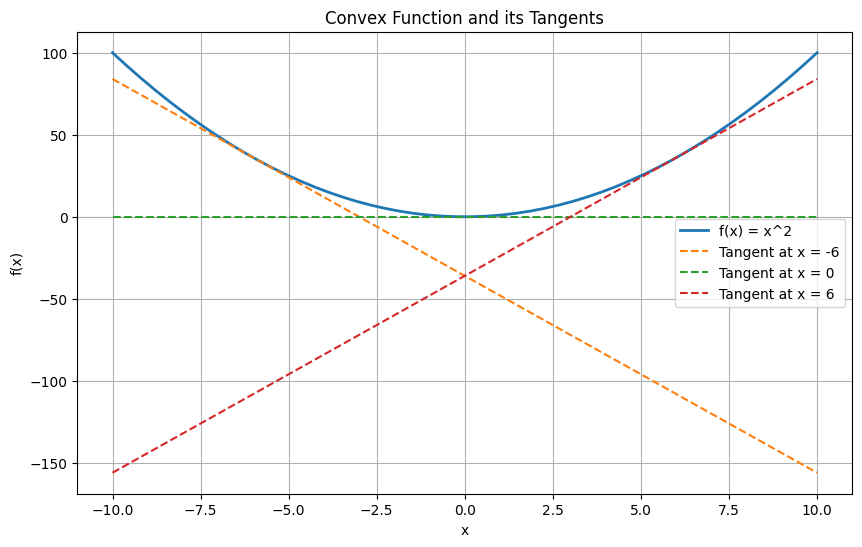

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define the convex function f(x) = x^2
def f(x):
    return x**2

# Define the tangent line at point a for f(x) = x^2
def tangent_line_y(x, a):
    return 2*a*(x - a) + f(a)

# Generate x values
tangent_demo_x = np.linspace(-10, 10, 50)
tangent_demo_y = f(tangent_demo_x)

# Generate tangent lines at points -6, 0, 6
tangent1ys = tangent_line_y(tangent_demo_x, -6)
tangent2ys = tangent_line_y(tangent_demo_x, 0)
tangent3ys = tangent_line_y(tangent_demo_x, 6)


# Plot the function and the tangent lines
plt.figure(figsize=(10, 6))
plt.plot(tangent_demo_x, tangent_demo_y, label='f(x) = x^2', linewidth=2)
plt.plot(tangent_demo_x, tangent1ys, '--', label='Tangent at x = -6')
plt.plot(tangent_demo_x, tangent2ys, '--', label='Tangent at x = 0')
plt.plot(tangent_demo_x, tangent3ys, '--', label='Tangent at x = 6')

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Convex Function and its Tangents')
plt.grid(True)

plt.show()